<a href="https://colab.research.google.com/github/killerkiemklan/Data-Mining-24-25/blob/main/ML_sem_1_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Model Selection

In this notebook, we are going to apply different ways to split your dataset and try to select the best model.

__`Step 1`__ Import the needed libraries

In [ ]:
!pip install xgboost==1.7.5
!pip install scikit-learn==1.2.2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Chiel > XGBoost, Perceptron.

Mariana > KNN, RFM, SVM

In [138]:
# Import the data
train_df = pd.read_csv('train_data1.csv')
test_df = pd.read_csv('test_data1.csv')
# Create mapping dictionary and apply it immediately to the DataFrame
county_mapping = {
    county: i for i, county in enumerate(sorted(train_df['County of Injury'].unique()))
}

# Apply mapping to the original DataFrame
train_df['County of Injury'] = train_df['County of Injury'].map(county_mapping)

print("County mapping:", county_mapping)

County mapping: {'ALBANY': 0, 'ALLEGANY': 1, 'BRONX': 2, 'BROOME': 3, 'CATTARAUGUS': 4, 'CAYUGA': 5, 'CHAUTAUQUA': 6, 'CHEMUNG': 7, 'CHENANGO': 8, 'CLINTON': 9, 'COLUMBIA': 10, 'CORTLAND': 11, 'DELAWARE': 12, 'DUTCHESS': 13, 'ERIE': 14, 'ESSEX': 15, 'FRANKLIN': 16, 'FULTON': 17, 'GENESEE': 18, 'GREENE': 19, 'HAMILTON': 20, 'HERKIMER': 21, 'JEFFERSON': 22, 'KINGS': 23, 'LEWIS': 24, 'LIVINGSTON': 25, 'MADISON': 26, 'MONROE': 27, 'MONTGOMERY': 28, 'NASSAU': 29, 'NEW YORK': 30, 'NIAGARA': 31, 'ONEIDA': 32, 'ONONDAGA': 33, 'ONTARIO': 34, 'ORANGE': 35, 'ORLEANS': 36, 'OSWEGO': 37, 'OTSEGO': 38, 'PUTNAM': 39, 'QUEENS': 40, 'RENSSELAER': 41, 'RICHMOND': 42, 'ROCKLAND': 43, 'SARATOGA': 44, 'SCHENECTADY': 45, 'SCHOHARIE': 46, 'SCHUYLER': 47, 'SENECA': 48, 'ST. LAWRENCE': 49, 'STEUBEN': 50, 'SUFFOLK': 51, 'SULLIVAN': 52, 'TIOGA': 53, 'TOMPKINS': 54, 'ULSTER': 55, 'UNKNOWN': 56, 'WARREN': 57, 'WASHINGTON': 58, 'WAYNE': 59, 'WESTCHESTER': 60, 'WYOMING': 61, 'YATES': 62}


In [ ]:
l = list(train_df.columns)
test_df = train_df[l]

In [117]:
import numpy as np

test_df = test_df.select_dtypes(include=np.number)
train_df = train_df.select_dtypes(include=np.number)

test_columns = set(test_df.columns)
train_columns = set(train_df.columns)

missing_columns = train_columns - test_columns
if missing_columns:
    print("Columns in train_df but not in test_df:", missing_columns)
else:
    print("All columns in train_df are present in test_df.")

All columns in train_df are present in test_df.


In [140]:
import numpy as np

test_df = test_df.select_dtypes(include=np.number)
train_df = train_df.select_dtypes(include=np.number)

test_columns = set(test_df.columns)
train_columns = set(train_df.columns)

# Check for columns in test_df but not in train_df
missing_columns = test_columns - train_columns

if missing_columns:
    print("Columns in test_df but not in train_df:", missing_columns)
else:
    print("All columns in test_df are present in train_df.")

All columns in test_df are present in train_df.


In [141]:
test_df.shape

(387975, 37)

In [ ]:
train_df.drop(['County of Injury', 'Agreement Reached'], axis=1, errors='ignore', inplace=True)

In [132]:
test_df.drop(['County of Injury', 'Agreement Reached', 'Claim Injury Type'], axis=1, errors='ignore', inplace=True)

## 1.1. The train-test split

70:30 splitting target column

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'train_df' is your DataFrame
data = train_df.drop('Claim Injury Type', axis=1)  # Independent variables
target = train_df['Claim Injury Type']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=15, shuffle=True, stratify=target)

# Label encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print('train:{}% | test:{}%'.format(round(len(y_train)/len(target),2),
                                                     round(len(y_test)/len(target),2)))

pd.set_option('display.max_columns', None)  # Display all columns (optional)

train:0.6% | test:0.4%


In [ ]:
pd.set_option('display.max_columns', None)
X_train = X_train.select_dtypes(include=np.number)

In [ ]:
X_train.columns


Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'COVID-19 Indicator', 'Zip Code', 'First Hearing Month',
       'First Hearing Year', 'Gender_F', 'Gender_M', 'Gender_U', 'Gender_X',
       'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
       'Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents', 'log_Average Weekly Wage', 'fe_Carrier Type',
       'fe_Medical Fee Region', 'fe_County of Injury', 'Age', 'Accident Month',
       'Accident Year', 'C-2 Month', 'C-2 Year', 'C-3 Month', 'C-3 Year',
       'Assembly Month', 'Assembly Year', 'fe_Industry Code',
       'fe_WCIO Part Of Body Code', 'fe_WCIO Cause of Injury Code',
       'fe_Zip Code', 'fe_WCIO Nature of Injury Code'],
      dtype='object')

Stratified Sampling: Ensures that the training and testing sets maintain the same class distribution as the original dataset, reducing bias.


Repeated Hold-Out: The process is repeated multiple times with different splits, and the average performance is considered.

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distributions
param_dist = {
    'learning_rate': uniform(0.01, 0.2),  # Uniform distribution between 0.01 and 0.2
    'n_estimators': randint(50, 200),  # Integer uniform distribution between 50 and 200
    'max_depth': randint(3, 10),  # Integer uniform distribution between 3 and 10
    'min_child_weight': randint(1, 6),  # Integer uniform distribution between 1 and 6
    'gamma': uniform(0, 0.2),  # Uniform distribution between 0 and 0.2
    'subsample': uniform(0.6, 0.4),  # Uniform distribution between 0.6 and 1.0 (0.6 + 0.4)
    'colsample_bytree': uniform(0.6, 0.4),  # Uniform distribution between 0.6 and 1.0 (0.6 + 0.4)
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='f1_macro',  # Use weighted F1 score for multi-class
    n_iter=10,  # Number of random combinations to try
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,
    verbose=2,
    random_state=15  # Set random state for reproducibility
)

# Fit the randomized search to your training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Get the best model
best_xgb_model = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'colsample_bytree': 0.878271124255651, 'gamma': 0.005831792181028583, 'learning_rate': 0.10989848394581679, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 137, 'subsample': 0.6593230976045076}
Best Score: 0.4155384827358888


In [ ]:
xgb_model = XGBClassifier(
    learning_rate=0.10989848394581679,
    n_estimators=137,
    max_depth=8,
    min_child_weight=3,
    gamma=0.005831792181028583,
    subsample=0.6593230976045076,
    colsample_bytree=0.878271124255651,
    objective='multi:softprob',
    random_state=15,
)

In [189]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier, callback
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def perform_rfe(X_train, X_test, y_train, y_test, n_splits=3):
    xgb_model = XGBClassifier(
        learning_rate=0.11,
        n_estimators=100,
        max_depth=8,
        min_child_weight=3,
        gamma=0.0058,
        subsample=0.66,
        colsample_bytree=0.88,
        objective='multi:softprob',
        random_state=15,
        eval_metric=['mlogloss', 'merror'],
        n_jobs=-1
    )

    print("Starting RFE with 3-fold CV...")

    best_f1 = 0
    best_features = None
    feature_mask = np.ones(X_train.shape[1], dtype=bool)
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=15)

    while np.sum(feature_mask) > 1:
        current_features = X_train.columns[feature_mask]
        cv_scores = []

        print(f"\nEvaluating {len(current_features)} features...")

        for train_idx, val_idx in cv.split(X_train, y_train):
            # Properly index numpy arrays
            X_fold_train = X_train.iloc[train_idx][current_features]
            X_fold_val = X_train.iloc[val_idx][current_features]
            y_fold_train = y_train[train_idx]  # Changed from iloc to direct indexing
            y_fold_val = y_train[val_idx]      # Changed from iloc to direct indexing

            xgb_model.fit(
                X_fold_train, y_fold_train,
                eval_set=[(X_fold_val, y_fold_val)],
                verbose=False,
                early_stopping_rounds=10
            )

            y_pred = xgb_model.predict(X_fold_val)
            fold_f1 = f1_score(y_fold_val, y_pred, average='macro')
            cv_scores.append(fold_f1)

        current_f1 = np.mean(cv_scores)
        current_std = np.std(cv_scores)

        print(f"CV F1: {current_f1:.4f} ± {current_std:.4f}")

        if current_f1 > best_f1:
            best_f1 = current_f1
            best_features = current_features
            print("New best feature set found!")

            xgb_model.fit(
                X_train[current_features],
                y_train,
                eval_set=[(X_test[current_features], y_test)],
                verbose=False
            )
            test_pred = xgb_model.predict(X_test[current_features])
            test_f1 = f1_score(y_test, test_pred, average='macro')
            print(f"Test F1: {test_f1:.4f}")

        importances = xgb_model.feature_importances_
        min_idx = np.argmin(importances)
        feature_to_remove = current_features[min_idx]
        print(f"Removing feature: {feature_to_remove}")

        feature_mask[X_train.columns == feature_to_remove] = False

    print(f"\nBest CV F1: {best_f1:.4f}")
    print(f"Best features ({len(best_features)}):")
    print(", ".join(best_features.tolist()))

    return best_features

# Execute
best_features = perform_rfe(X_train, X_test, y_train, y_test)

Starting RFE with 3-fold CV...

Evaluating 37 features...
CV F1: 0.4093 ± 0.0024
New best feature set found!
Test F1: 0.4228
Removing feature: Number of Dependents

Evaluating 36 features...
CV F1: 0.4101 ± 0.0093
New best feature set found!
Test F1: 0.4268
Removing feature: fe_Zip Code

Evaluating 35 features...
CV F1: 0.4048 ± 0.0014
Removing feature: Gender_X

Evaluating 34 features...
CV F1: 0.4093 ± 0.0036
Removing feature: Age

Evaluating 33 features...
CV F1: 0.4068 ± 0.0080
Removing feature: Birth Year

Evaluating 32 features...
CV F1: 0.4127 ± 0.0066
New best feature set found!
Test F1: 0.4267
Removing feature: Accident Month

Evaluating 31 features...
CV F1: 0.4088 ± 0.0080
Removing feature: fe_Medical Fee Region

Evaluating 30 features...
CV F1: 0.4049 ± 0.0088
Removing feature: Assembly Month

Evaluating 29 features...
CV F1: 0.4050 ± 0.0130
Removing feature: Age at Injury

Evaluating 28 features...
CV F1: 0.4072 ± 0.0022
Removing feature: Gender_F

Evaluating 27 features..

Training model for feature importance analysis...

Macro F1 Score: 0.4228

Feature Importance Rankings:
                       Feature  Importance  Rank  Cumulative_Importance  Importance_Percentage
       Attorney/Representative    0.226724     1               0.226724              22.672377
           Average Weekly Wage    0.220676     2               0.447400              22.067646
       log_Average Weekly Wage    0.200432     3               0.647833              20.043221
Alternative Dispute Resolution    0.039758     4               0.687591               3.975842
            COVID-19 Indicator    0.031987     5               0.719578               3.198692
                   IME-4 Count    0.025919     6               0.745497               2.591913
                 Accident Year    0.018061     7               0.763558               1.806115
               fe_Carrier Type    0.014908     8               0.778466               1.490824
    WCIO Nature of Injury Code    0.01370

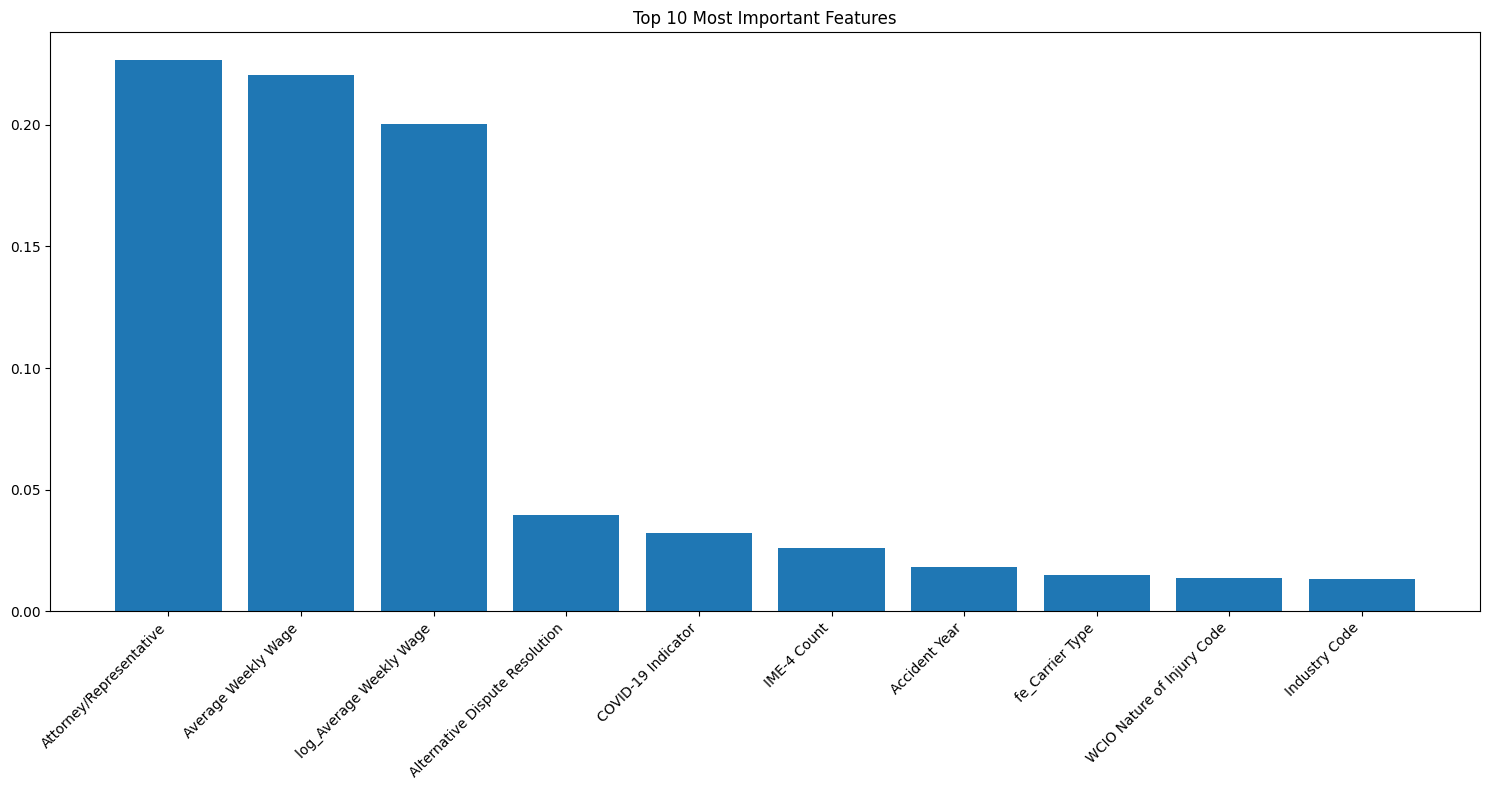

In [191]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

def analyze_feature_importance(X_train, X_test, y_train, y_test):
    # Initialize model
    xgb_model = XGBClassifier(
        learning_rate=0.11,
        n_estimators=100,
        max_depth=8,
        min_child_weight=3,
        gamma=0.0058,
        subsample=0.66,
        colsample_bytree=0.88,
        objective='multi:softprob',
        random_state=15,
        eval_metric=['mlogloss', 'merror'],
        n_jobs=-1
    )

    print("Training model for feature importance analysis...")

    # Fit model
    xgb_model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
    )

    # Get predictions and F1 score
    y_pred = xgb_model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"\nMacro F1 Score: {f1:.4f}")

    # Feature importance analysis
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': xgb_model.feature_importances_
    })

    # Sort by importance and add rank
    importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
    importance_df['Rank'] = importance_df.index + 1

    # Add cumulative importance
    importance_df['Cumulative_Importance'] = importance_df['Importance'].cumsum()

    # Calculate percentage importance
    importance_df['Importance_Percentage'] = importance_df['Importance'] / importance_df['Importance'].sum() * 100

    print("\nFeature Importance Rankings:")
    print(importance_df.to_string(index=False))

    # Print top features accounting for 80% of importance
    cutoff_80 = importance_df[importance_df['Cumulative_Importance'] <= 1]
    print(f"\nTop features accounting for 80% of importance: {len(cutoff_80)} features")

    return importance_df

# Execute
importance_results = analyze_feature_importance(X_train, X_test, y_train, y_test)

# Plotting feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.bar(importance_results['Feature'][:10], importance_results['Importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

In [ ]:
dupes droppen

In [167]:
# maybe even decision tree with XGBoost and drop features to see what happens.? - after an RFE or before

In [111]:
xgb_model = XGBClassifier(
    learning_rate=0.10989848394581679,
    n_estimators=137,
    max_depth=8,
    min_child_weight=3,
    gamma=0.005831792181028583,
    subsample=0.6593230976045076,
    colsample_bytree=0.878271124255651,
    objective='multi:softprob',
    random_state=15,
)

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

# Create and fit decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Get feature importances and macro F1
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

f1_macro = f1_score(y_test, dt.predict(X_test), average='macro')

print(f"Macro F1 Score: {f1_macro:.3f}")
print("\nTop 40 Feature Importances:")
print(importances.head(40))

Macro F1 Score: 0.349

Top 40 Feature Importances:
                           feature  importance
11             Average Weekly Wage    0.378876
3                         Zip Code    0.044994
1          Attorney/Representative    0.042887
35                     fe_Zip Code    0.040826
10                   Age at Injury    0.031433
14                   Industry Code    0.031336
34    fe_WCIO Cause of Injury Code    0.028894
17          WCIO Part Of Body Code    0.028780
15       WCIO Cause of Injury Code    0.025558
33       fe_WCIO Part Of Body Code    0.024599
22             fe_County of Injury    0.024148
18            Number of Dependents    0.022092
16      WCIO Nature of Injury Code    0.021546
24                  Accident Month    0.021480
23                             Age    0.019001
12                      Birth Year    0.018353
32                fe_Industry Code    0.017498
4              First Hearing Month    0.017414
36   fe_WCIO Nature of Injury Code    0.016078
26       

In [176]:
train_df.columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'Zip Code',
       'Agreement Reached', 'First Hearing Month', 'First Hearing Year',
       'Gender_F', 'Gender_M', 'Gender_U', 'Gender_X', 'Age at Injury',
       'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Number of Dependents',
       'log_Average Weekly Wage', 'fe_Carrier Type', 'fe_Medical Fee Region',
       'fe_County of Injury', 'Age', 'Accident Month', 'Accident Year',
       'C-2 Month', 'C-2 Year', 'C-3 Month', 'C-3 Year', 'Assembly Month',
       'Assembly Year', 'fe_Industry Code', 'fe_WCIO Part Of Body Code',
       'fe_WCIO Cause of Injury Code', 'fe_Zip Code',
       'fe_WCIO Nature of Injury Code', 'Claim Injury Type'],
      dtype='object')

In [178]:
# Get the list of desired features
selected_features = ['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'Zip Code',
       'Agreement Reached', 'First Hearing Month', 'First Hearing Year',
       'Gender_F', 'Gender_M', 'Gender_U', 'Gender_X', 'Age at Injury',
       'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Number of Dependents',
       'log_Average Weekly Wage', 'fe_Carrier Type', 'fe_Medical Fee Region',
       'fe_County of Injury', 'Age', 'Accident Month', 'Accident Year',
       'C-2 Month', 'C-2 Year', 'C-3 Month', 'C-3 Year', 'Assembly Month',
       'Assembly Year', 'fe_Industry Code', 'fe_WCIO Part Of Body Code',
       'fe_WCIO Cause of Injury Code', 'fe_Zip Code',
       'fe_WCIO Nature of Injury Code', 'Claim Injury Type']

# # Filter the training and testing data to include only these features
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

In [172]:
xgb_model.fit(
    X_train_selected,  # Use the filtered training data
    y_train,
    eval_set=[(X_train_selected, y_train), (X_test_selected, y_test)],  # Use the filtered evaluation data
    eval_metric=['mlogloss', 'merror'],
    early_stopping_rounds=20,
    verbose=True
)

[0]	validation_0-mlogloss:1.83281	validation_0-merror:0.23834	validation_1-mlogloss:1.83409	validation_1-merror:0.24014
[1]	validation_0-mlogloss:1.65355	validation_0-merror:0.23736	validation_1-mlogloss:1.65564	validation_1-merror:0.23907
[2]	validation_0-mlogloss:1.51943	validation_0-merror:0.23733	validation_1-mlogloss:1.52241	validation_1-merror:0.23874
[3]	validation_0-mlogloss:1.40782	validation_0-merror:0.23614	validation_1-mlogloss:1.41160	validation_1-merror:0.23765
[4]	validation_0-mlogloss:1.33386	validation_0-merror:0.23485	validation_1-mlogloss:1.33835	validation_1-merror:0.23714
[5]	validation_0-mlogloss:1.25319	validation_0-merror:0.23428	validation_1-mlogloss:1.25845	validation_1-merror:0.23681
[6]	validation_0-mlogloss:1.18480	validation_0-merror:0.23419	validation_1-mlogloss:1.19077	validation_1-merror:0.23669
[7]	validation_0-mlogloss:1.12586	validation_0-merror:0.23366	validation_1-mlogloss:1.13254	validation_1-merror:0.23647
[8]	validation_0-mlogloss:1.07535	valida

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.878271124255651, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.005831792181028583, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10989848394581679, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=137, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [170]:
# Get top 27 features
top_features = importances.head(13)['feature'].tolist()

# Filter data
X_train_filtered = X_train[top_features]
X_test_filtered = X_test[top_features]

# Rerun model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_filtered, y_train)

# Get new importances and F1
importances_new = pd.DataFrame({
    'feature': X_train_filtered.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

f1_macro_new = f1_score(y_test, dt.predict(X_test_filtered), average='macro')

print(f"New Macro F1 Score: {f1_macro_new:.3f}")
print("\nFeature Importances:")
print(importances_new)

New Macro F1 Score: 0.320

Feature Importances:
                         feature  importance
0            Average Weekly Wage    0.407189
4                  Age at Injury    0.082384
1                       Zip Code    0.076428
3                    fe_Zip Code    0.071110
5                  Industry Code    0.053657
11          Number of Dependents    0.043903
2        Attorney/Representative    0.042897
6   fe_WCIO Cause of Injury Code    0.039129
12    WCIO Nature of Injury Code    0.038260
8      WCIO Cause of Injury Code    0.037787
10           fe_County of Injury    0.036168
7         WCIO Part Of Body Code    0.035731
9      fe_WCIO Part Of Body Code    0.035358


In [113]:
# Make predictions on test set
y_pred = xgb_model.predict(X_test)

# Get prediction probabilities (useful for more detailed analysis)
y_pred_proba = xgb_model.predict_proba(X_test)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy score
from sklearn.metrics import accuracy_score
print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred), 4))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59      3976
           1       0.85      0.98      0.91     93240
           2       0.49      0.07      0.13     22050
           3       0.73      0.86      0.79     47474
           4       0.68      0.60      0.64     15435
           5       0.32      0.01      0.02      1329
           6       0.00      0.00      0.00        34
           7       0.71      0.27      0.39       150

    accuracy                           0.79    183688
   macro avg       0.56      0.41      0.43    183688
weighted avg       0.75      0.79      0.75    183688


Accuracy Score: 0.7895


In [114]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)


# Print classification report (includes F1-score)
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the F1-score
from sklearn.metrics import f1_score, accuracy_score
f1 = f1_score(y_test, y_pred, average='macro')
print("\nF1 Score:", round(f1, 4))

# Calculate accuracy for train and test data
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy scores
print(f"\nTrain Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59      3976
           1       0.85      0.98      0.91     93240
           2       0.49      0.07      0.13     22050
           3       0.73      0.86      0.79     47474
           4       0.68      0.60      0.64     15435
           5       0.32      0.01      0.02      1329
           6       0.00      0.00      0.00        34
           7       0.71      0.27      0.39       150

    accuracy                           0.79    183688
   macro avg       0.56      0.41      0.43    183688
weighted avg       0.75      0.79      0.75    183688


F1 Score: 0.4325

Train Accuracy: 0.8180
Test Accuracy: 0.7895


In [115]:
# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Calculate F1-scores
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, y_pred_train, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')

# Print F1-scores
print(f"Train F1-score: {train_f1:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

Train F1-score: 0.6201
Test F1-score: 0.4325


In [143]:
# Make predictions on test_df
y_pred_test_df = xgb_model.predict(test_df)

# Get prediction probabilities (useful for more detailed analysis)
y_pred_proba_test_df = xgb_model.predict_proba(test_df)

# Print the predictions
print("Predictions on test_df:")
print(y_pred_test_df)

# If you have true labels for test_df (let's say y_test_df), you can evaluate the predictions
# Assuming y_test_df contains the true labels for test_df
if 'y_test_df' in locals():
    # Print classification report (includes F1-score)
    from sklearn.metrics import classification_report
    print("\nClassification Report for test_df:")
    print(classification_report(y_test_df, y_pred_test_df))

    # Calculate and print the F1-score
    from sklearn.metrics import f1_score
    f1_test_df = f1_score(y_test_df, y_pred_test_df, average='macro')  # Use 'weighted' for multi-class
    print("\nF1 Score for test_df:", round(f1_test_df, 4))

Predictions on test_df:
[2 2 2 ... 2 2 1]


In [148]:
test_df

,Alternative Dispute Resolution,Attorney/Representative,COVID-19 Indicator,Zip Code,First Hearing Month,First Hearing Year,Gender_F,Gender_M,Gender_U,Gender_X,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,log_Average Weekly Wage,fe_Carrier Type,fe_Medical Fee Region,fe_County of Injury,Age,Accident Month,Accident Year,C-2 Month,C-2 Year,C-3 Month,C-3 Year,Assembly Month,Assembly Year,fe_Industry Code,fe_WCIO Part Of Body Code,fe_WCIO Cause of Injury Code,fe_Zip Code,fe_WCIO Nature of Injury Code
0,0,0,0,10466,2,2024,0.0,1.0,0.0,0.0,-1.000000,0.0,1.181818,0.0,-0.764706,-0.568182,-1.444444,0.80,-0.50,0.0,1.014715,0.737734,0.276279,1.181818,0.833333,0.5,-0.833333,1.0,6.0,2.0,-1.000000,1.0,-0.092996,-0.345208,0.730470,1.262322,0.396745
1,0,0,0,11691,2,2024,1.0,0.0,0.0,0.0,-1.000000,0.0,1.181818,0.0,-0.941176,0.431818,-1.444444,-1.40,-0.50,0.0,1.014715,0.737734,0.713477,1.181818,0.666667,0.5,-0.833333,1.0,6.0,2.0,-1.000000,1.0,-0.303039,-0.449069,0.143503,0.464628,0.396745
2,0,0,0,10604,2,2024,1.0,0.0,0.0,0.0,0.739130,0.0,-0.636364,0.0,-0.294118,0.272727,0.000000,1.20,-0.75,0.0,1.014715,-0.465878,-0.095287,-0.636364,0.833333,0.5,1.000000,0.5,6.0,2.0,-1.000000,1.0,-0.314730,-0.649020,-0.192220,-0.489248,-0.167654
3,0,0,0,11411,2,2024,1.0,0.0,0.0,0.0,0.565217,0.0,-89.863636,0.0,-0.764706,-0.704545,-1.444444,0.75,0.75,0.0,1.014715,0.737734,0.713477,-89.863636,0.833333,0.5,-0.833333,1.0,6.0,2.0,-1.000000,1.0,-0.092996,0.493652,-0.275604,-0.089111,0.396745
4,0,0,0,11212,2,2024,0.0,1.0,0.0,0.0,-0.739130,0.0,0.909091,0.0,-0.352941,0.522727,-0.333333,-0.05,0.50,0.0,1.014715,0.737734,0.555752,0.909091,0.833333,0.5,1.000000,0.5,6.0,2.0,-1.000000,1.0,-0.581858,-0.281945,-0.116279,1.560489,-0.126650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387970,0,0,0,13619,2,2024,0.0,1.0,0.0,0.0,0.434783,0.0,-0.772727,0.0,0.000000,0.000000,-0.222222,-0.10,0.50,0.0,-0.138795,-0.004150,-0.648977,-0.772727,0.333333,-4.5,0.666667,-4.5,6.0,2.0,-0.166667,1.5,0.352621,0.795561,1.839870,-0.509901,-0.256642
387971,0,1,0,11776,2,2024,1.0,0.0,0.0,0.0,0.739130,0.0,-0.545455,0.0,0.000000,0.000000,-0.222222,-0.10,-0.50,0.0,-0.030288,0.737734,0.582282,-0.545455,-0.333333,1.5,0.666667,1.0,1.0,3.0,-0.166667,1.5,0.352621,0.795561,1.839870,0.058037,-0.256642
387972,0,1,0,11368,2,2024,0.0,1.0,0.0,0.0,0.130435,0.0,0.090909,0.0,0.000000,0.000000,-0.222222,-0.10,0.50,0.0,-0.138795,0.737734,0.713477,0.090909,-0.333333,1.5,0.666667,1.0,6.0,2.0,-0.166667,1.5,0.352621,0.795561,1.839870,1.924485,-0.256642
387973,0,1,0,11432,2,2024,0.0,1.0,0.0,0.0,0.000000,0.0,0.181818,0.0,0.000000,0.000000,-0.222222,-0.10,0.50,0.0,-0.373260,0.737734,0.713477,0.181818,-0.833333,1.5,0.666667,1.0,1.0,3.0,-0.166667,1.5,0.352621,0.795561,1.839870,0.451721,-0.256642


In [147]:
sample_submission.value_counts()

,,count
Claim Identifier,Claim Injury Type,
6165686,2. NON-COMP,1
6424604,2. NON-COMP,1
6424613,2. NON-COMP,1
6424612,2. NON-COMP,1
6424611,2. NON-COMP,1
...,...,...
6295157,2. NON-COMP,1
6295156,2. NON-COMP,1
6295155,2. NON-COMP,1


In [149]:
injury_mapping = {
       0: '1. NON-COMP',
       1: '2. CANCELLED',
       2: '3. MED ONLY',
       3: '4. TEMPORARY',
       4: '5. PPD SCH LOSS',
       5: '6. PPD NSL',
       6: '7. PTD',
       7: '8. DEATH'
   }

y_pred_test_df_mapped = [injury_mapping[pred] for pred in y_pred_test_df]

sample_submission = pd.read_csv('sample_submission.csv')

sample_submission['Claim Injury Type'] = y_pred_test_df_mapped

sample_submission.to_csv('updated_submission.csv', index=False)


In [ ]:
claim